# Customer Segmentation - Shopping Mall 

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [335]:
data = pd.read_csv(r"C:\Users\navab\Downloads\Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
## Pretty much the data looks normally distributed! sice there is not much diff b/w percentiles

In [9]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Univariate Analysis
Involves Single variable

In [61]:
def histplot(cols):
    for column in cols:
        plt.figure()
        plt.title(column+' '+'Skew:'+str(data[column].skew()))
        sns.histplot(data=data,x=str(column),hue='Gender',kde=True)

In [62]:
#starting from checking the distribution of the data 

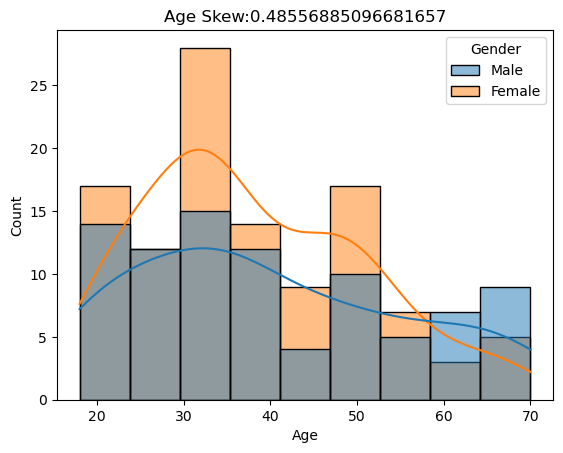

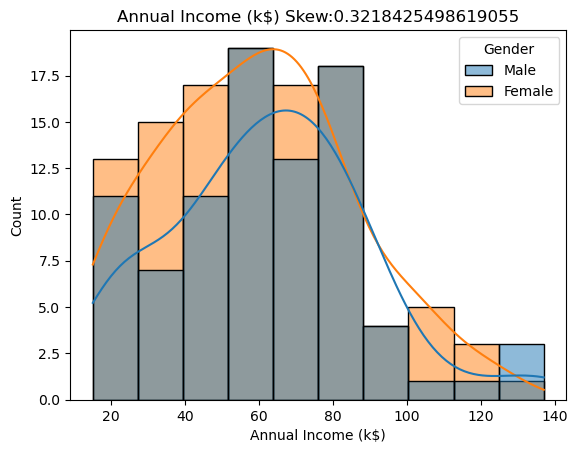

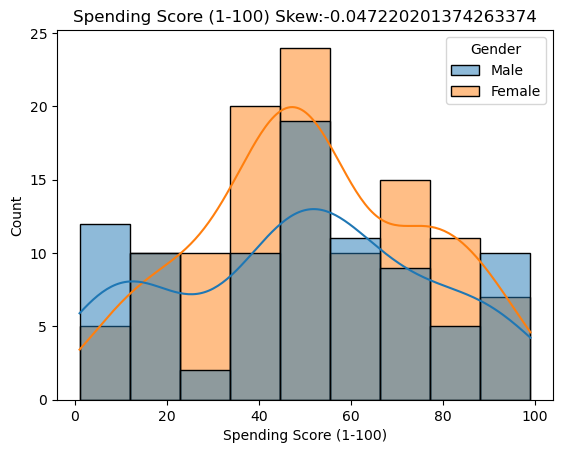

In [63]:
histplot(['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'])

## DESCRIPTION OF COLUMNS
### Age:<br>
The 'AGE' column displays a slight right skew, indicating a some mean age(20-50) customer base at the shopping mall. When analyzed by gender, we see that the upper bound of female customers is higher than that of males, particularly under the age of 60.
<br>
### Annual Income:<br>
Similar to the age distribution, annual income is also right-skewed. Compared to males, the majority of female customers' incomes are slightly concentrated on the left side of the median. 
<br>
 ### Spending Score:<br>
Regarding spending scores, apart from younger and older males (who spend on items like PlayStation games and toys), females tend to have significantly higher spending during their median age periods.
<br>
### PRESCRIPTIONS
### Focus on Younger Male Customers: 
To attract more younger male customers, consider introducing special offers on male shopping items and men's wear.<br>
We may intruduce boys' fancy wears along with mens' care with some exclusive offers too.
### Product Pricing Strategy:
With nearly a quarter of customers having an income in the 20k-70k range and very few high earners, it would be prudent not to heavily invest in too much expensive items.
### Boosting Male Spending Scores: 
Boys tend to have lower spending scores compared to girls, except for young Ones who may insist on getting certain items. <br>This suggests a higher level of maturity among boys, who are less inclined to make additional purchases. Introducing attractive combo deals for boys and strategically placing girls' items in these combos could positively impact overall sales.

In [99]:
data['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

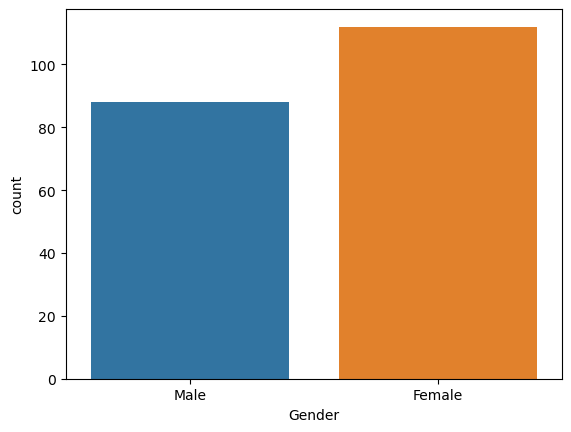

In [65]:
sns.countplot(data=data,x='Gender')

In [92]:
def boxplot(cols):
    for col in cols:
        plt.figure()
        plt.title(col)
        sns.boxplot(data=data,x='Gender',y=col)

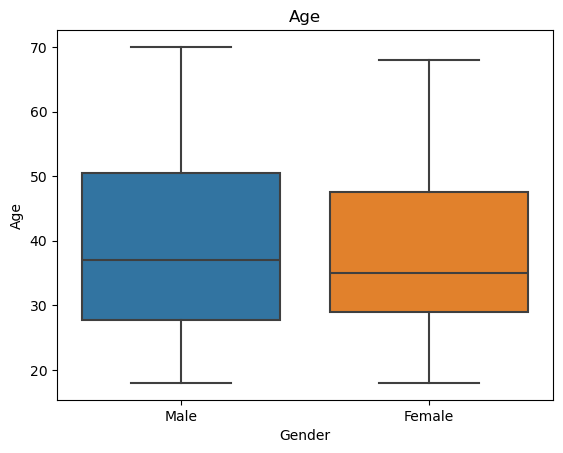

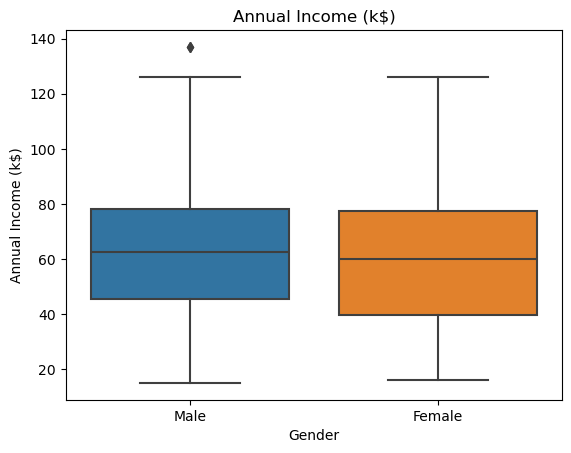

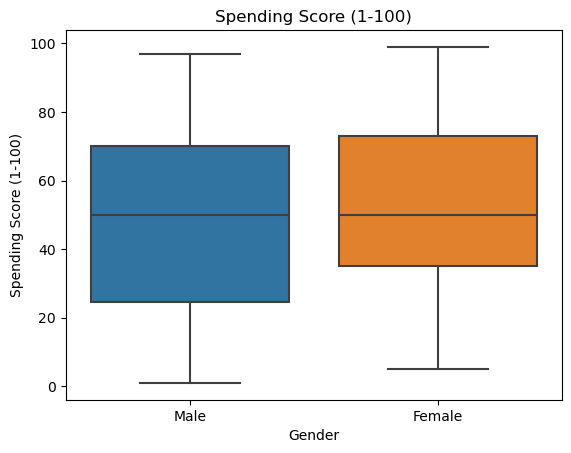

In [93]:
boxplot(['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'])

In [96]:
def kdeplot(cols):
    for col in cols:
        plt.figure()
        plt.title(col)
        sns.kdeplot(data=data,x=col,hue='Gender',fill=True)

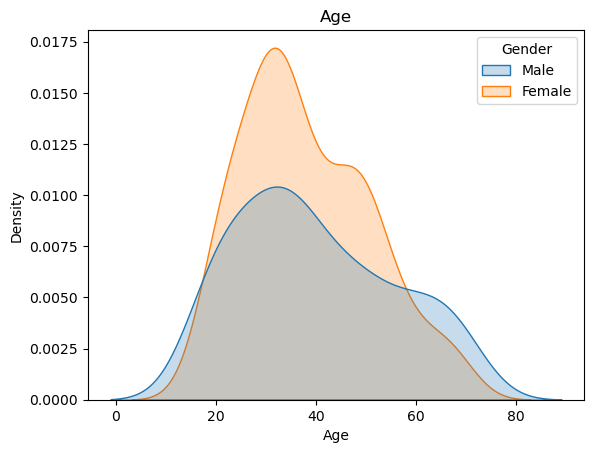

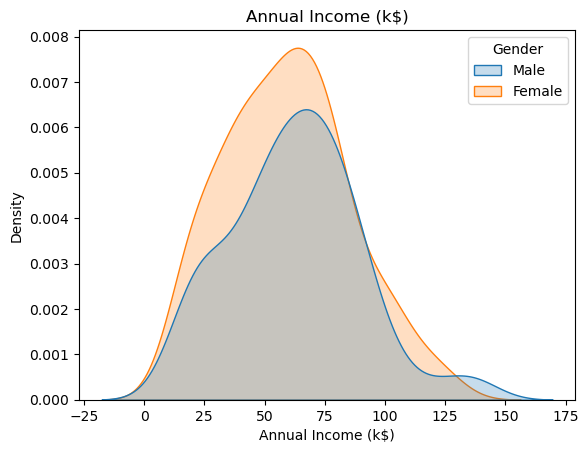

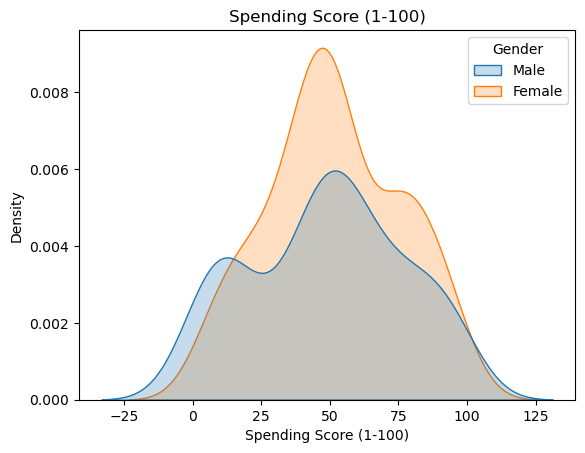

In [97]:
kdeplot(['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'])

Men seemed more consistent throughout their entire shopping career, while women showed higher activity during the median age intervals. Notably, female <br>customers' shopping frequency drastically reduced outside the 20-40 age range. Additionally, these female customers often had an annual income <br>greater than that of their male counterparts. This suggests that the mall may offer more expensive, high-end, or girly items.(As the countplot says too...!)

### Bi-Variate Analysis
involves two variable

In [80]:
data[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Text(0, 0.5, 'Annual Income (k$)')

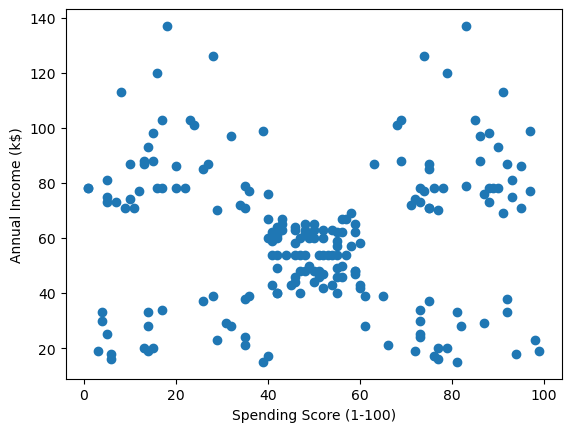

In [98]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

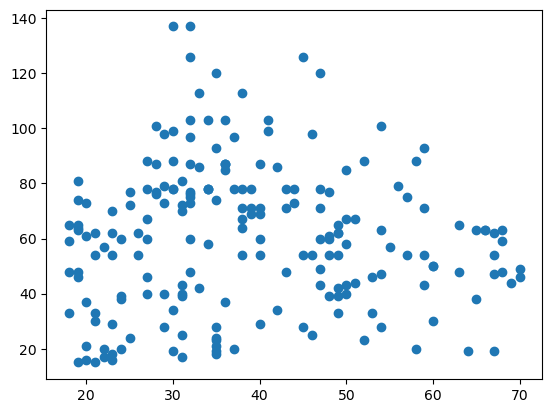

In [85]:
plt.scatter(data['Age'],data['Annual Income (k$)'])

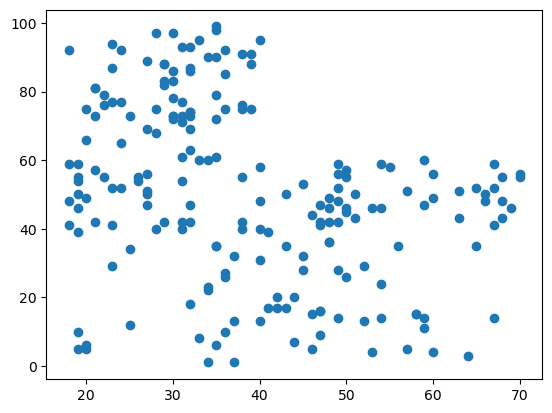

In [91]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])

Thus while placing along in 2D plane we can definetly say there would be no linear relations between any of the variable (also seen the corr table too)<br>
But some variable form some groups or cluster of points together especially when doing across 'Spending Score (1-100)' vs 'Annual Income (k$)'<br>
We will do it further specially on cluster analysis 

Since others' were having no relations each other we may focus and intrepret on those 2 features 'Spending Score (1-100)' & 'Annual Income (k$)' by leaving other bivariate combinations

In [89]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

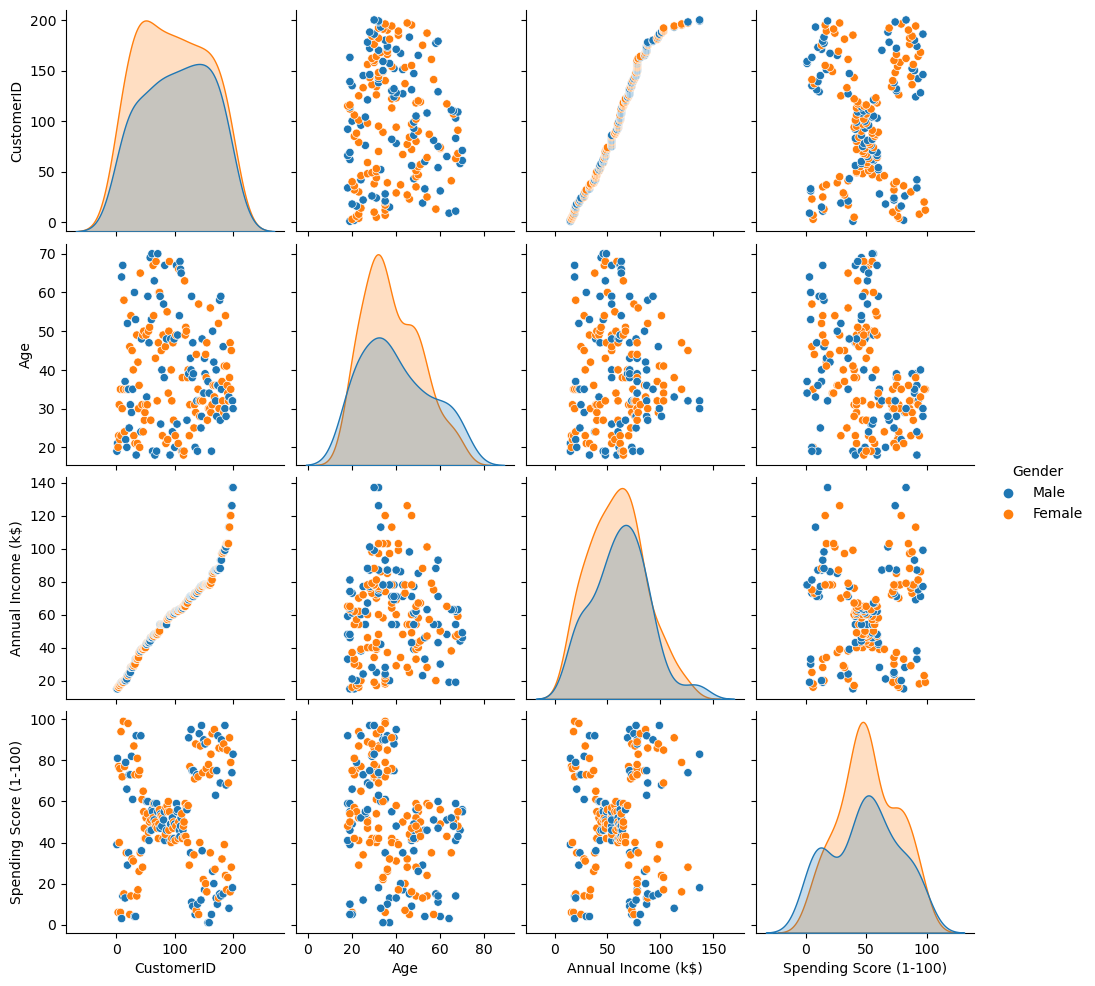

In [104]:
sns.pairplot(data,hue='Gender')

IN : -> Age vs Spending Score, ❤️‍🔥
<br>  We Can see that our most valuable high spending customers are in the range of age (20-38), having ss score +40 greater than others... <br>wow it looks same as what we said above cells right! 😊
<br>
by looking  cus_id against ss score there is some clusters formed respective of ss score

In [105]:
#we may drop the customer id since we did not do anything on masters' table right!
data.drop('CustomerID',axis=1,inplace=True)

In [107]:
data.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [108]:
#Both The male and female are in similar ages 🤞
#but one thing is though avg of females' income is slightly less than males' they are spending most than males 😲

## Time For Clustering ! 😉
### Let's Group Similar Customers' together by Kmeans

### Bivariate Clustering

In [142]:
#init the Kmeans Class from sklearn
kmeans1 = KMeans() # we also specify the params lets leave it to default no .8
#Took Annual Income (k$)	columns
#fitting
kmeans1.fit(data[['Annual Income (k$)']]) #kmeans won't allow 1-d array , expects 2-D array !

KMeans()

In [143]:
#let's check score 
kmeans1.inertia_ #nothing but it a euclidean dist from centroids to cluster data points

2822.4996947496948

In [144]:
kmeans1.cluster_centers_ # Here we are having default 8 centroids' 🤞🤞🤞

array([[ 22.        ],
       [ 62.11111111],
       [102.        ],
       [ 38.84615385],
       [ 75.0952381 ],
       [ 50.42857143],
       [127.66666667],
       [ 87.625     ]])

In [145]:
label = kmeans1.labels_ #inferencing the clusters labels

In [146]:
#lets add the labels to data
data['income_clusters']=label

In [147]:
data['income_clusters'].value_counts()

income_clusters
4    42
1    36
0    32
5    28
3    26
7    16
2    14
6     6
Name: count, dtype: int64

In [148]:
#Oh nah! it seems unnormal spread of points along the clusters It seems it is better to drop some groups yeah..😁

In [149]:
#lets' do some interesting aggregations..

In [155]:
data.groupby('income_clusters')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income_clusters,,,
0,34.906250,22.000000,49.656250
1,41.055556,62.111111,49.000000
2,36.500000,102.000000,53.000000
3,39.846154,38.846154,49.730769
4,35.428571,75.095238,51.095238
5,46.035714,50.428571,50.892857
6,36.833333,127.666667,49.666667
7,39.375000,87.625000,48.937500


In [158]:
#Actually i don't think to have 8 cluster because the scatterplot itself clearly shown as a 5 groups so it may cause something about within cluster ratio to withoutside cluster dist ratio
#let's check it out through silhoutte score

In [167]:
silhouette_score(data[['Annual Income (k$)']],data['income_clusters'])

0.6092272654893595

In [169]:
#60% really low fro this kind of simpler data points lets' reduce it by Elbow Method

<Axes: title={'center': 'Actual income'}, xlabel='Annual Income (k$)'>

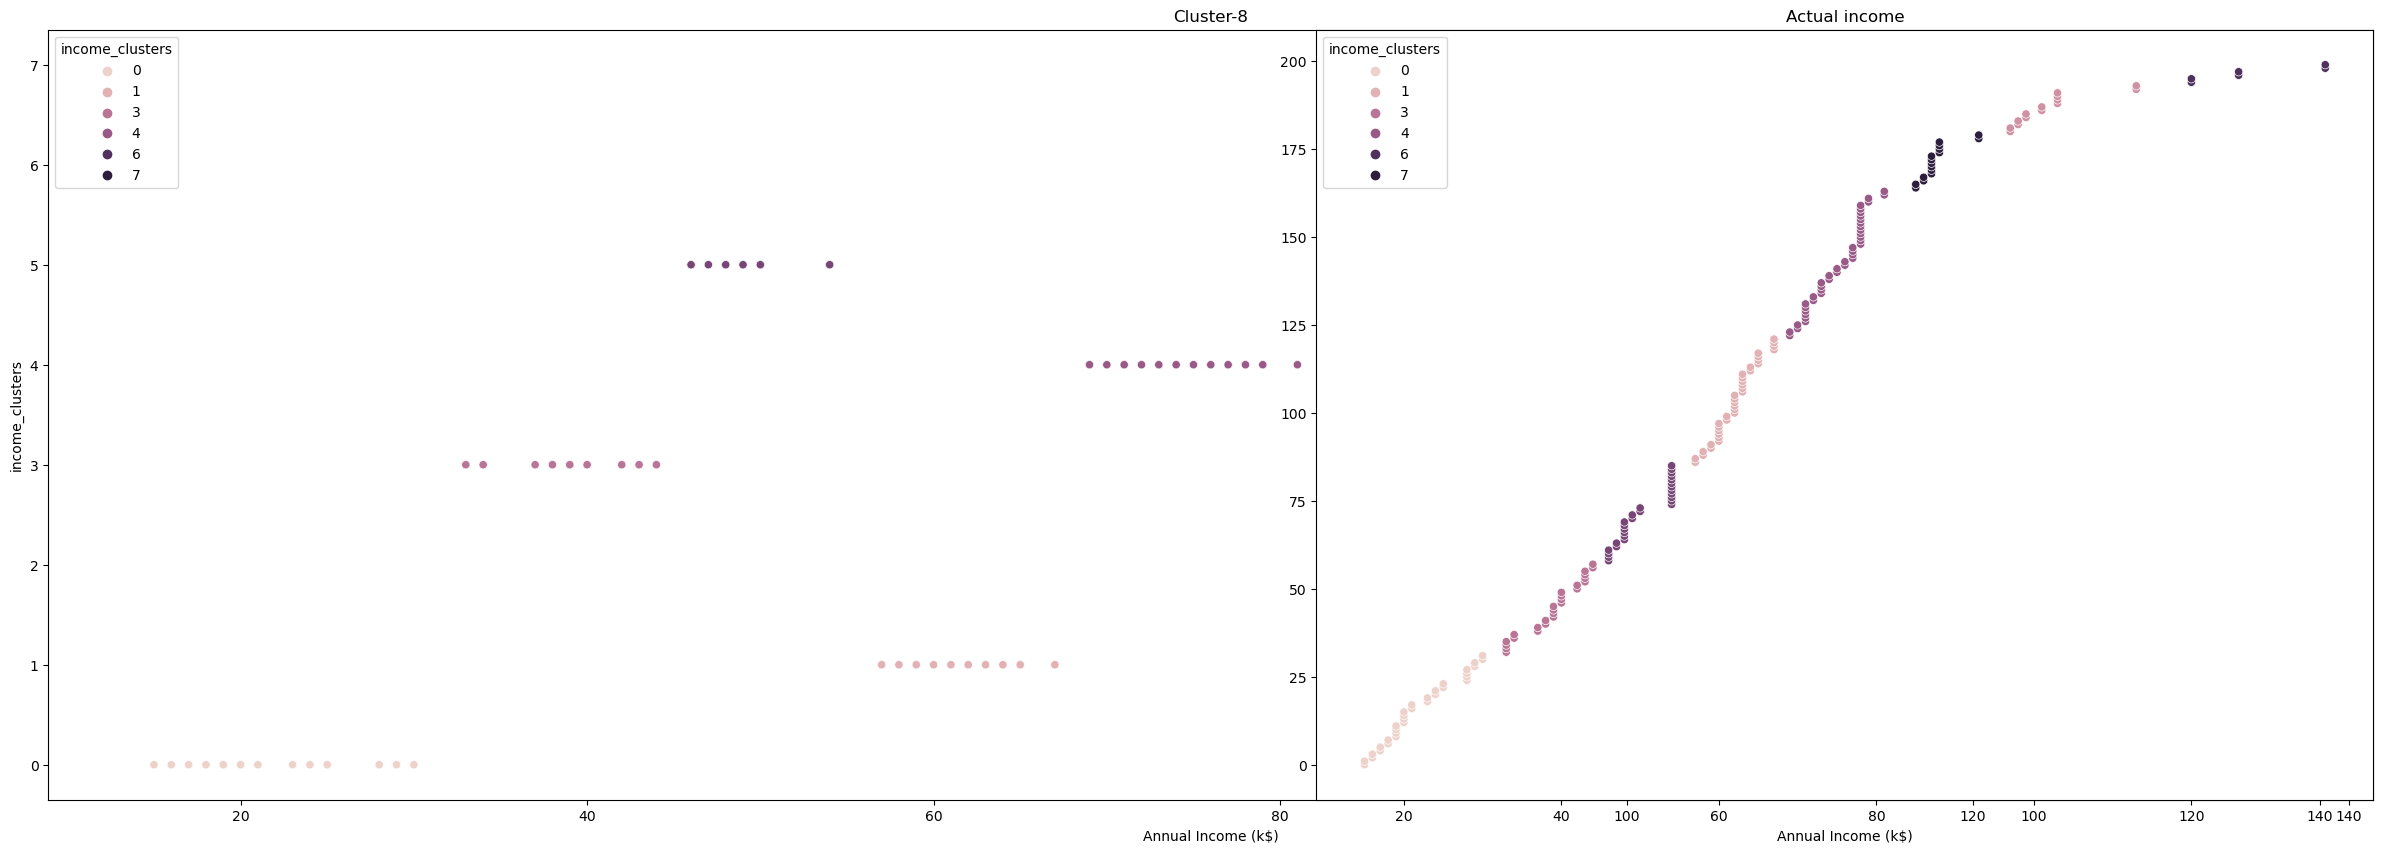

In [205]:
#before that we may plot it out!
plt.figure(figsize=(30,10))
plt.subplot(111)
plt.title('Cluster-8')
sns.scatterplot(x=data['Annual Income (k$)'],y=data['income_clusters'],hue=data['income_clusters'])
plt.subplot(122)
plt.title('Actual income')
sns.scatterplot(x=data['Annual Income (k$)'],y=range(0,data.shape[0]),hue=data['income_clusters'])

In [206]:
#but actually it doesnt make sense anything valuable right , we should'nt cluster a single linear object! right 😊🤞🤞

In [207]:
#so we won;t do elbow method for this

In [210]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(data[['Annual Income (k$)']], label)

0.43238599938432176

In [211]:
#well folks we found it though silhouette score is somewhat good to see , it only defines the cluster quality among  data poins(i.e separable)
#but when we comes to ratio of within-cluster distances to between-cluster distances. since the data is linearly close it has low score (0 indicates well defined cluster)

### Bi-Variate Clustering...

In [255]:
kmeans2 = KMeans()
#lets choose the most appropriate twos such annual income & ss score
kmeans2.fit(data[['Annual Income (k$)','Spending Score (1-100)']]) 

KMeans()

In [216]:
kmeans2.inertia_

25030.383098520328

In [217]:
kmeans2.cluster_centers_ 

array([[ 62.23404255,  47.55319149],
       [ 79.70833333,  14.29166667],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [ 78.55172414,  82.17241379],
       [109.7       ,  22.        ],
       [ 45.97368421,  51.26315789],
       [109.7       ,  82.        ]])

In [218]:
label2 = kmeans2.labels_

In [219]:
data['income&ss_score_clusters'] = label2

In [222]:
data['income&ss_score_clusters'].value_counts() #seems unmatched right!

income&ss_score_clusters
0    47
6    38
4    29
1    24
2    21
3    21
5    10
7    10
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

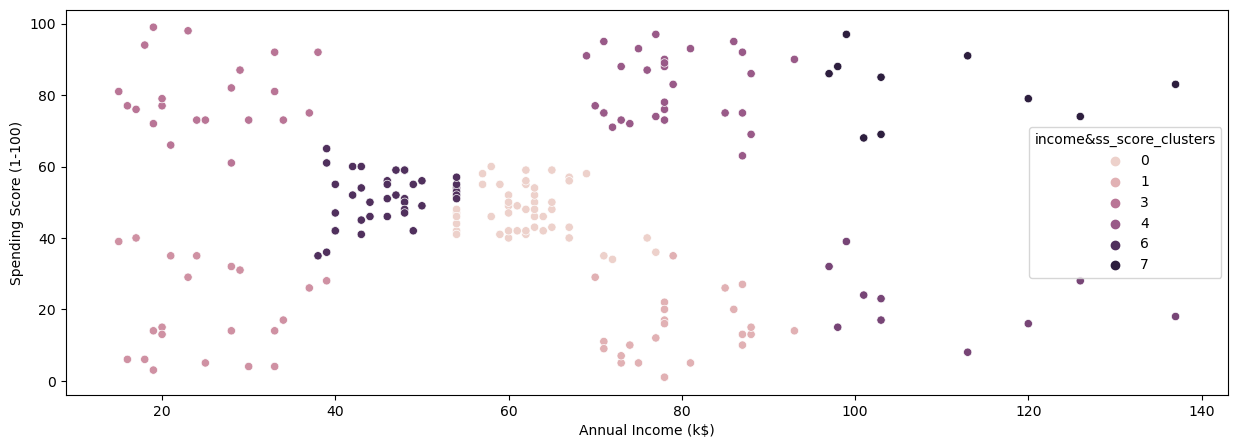

In [230]:
#plotting
plt.figure(figsize=(15,5))
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=data['income&ss_score_clusters'])

In [232]:
#Definetly there are some unneccessary clusters right also in addition wrong data points are goruped to diff clusters!

In [233]:
silhouette_score(data[['Annual Income (k$)','Spending Score (1-100)']],data['income&ss_score_clusters'])

0.45407359550241166

In [235]:
#very less right because of overlapping + data points are wrongly clustered 😮‍💨

In [236]:
davies_bouldin_score(data[['Annual Income (k$)','Spending Score (1-100)']],data['income&ss_score_clusters'])

0.7583382513486567

In [237]:
#now avg ratio b/w within clu dist and b/w clus dista is increased(very poor) Indicates poorer clustering, with more overlap between clusters.

In [238]:
#elbow method

In [268]:
#iterate through no of clusters and choosing the one (elbow cut )having lowest inertia_score(dist or error) 
inertia = []
si_score = []
wc_score = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(data[['Annual Income (k$)','Spending Score (1-100)']]) 
    inertia.append(km.inertia_)
    si_score.append(silhouette_score(data[['Annual Income (k$)','Spending Score (1-100)']],km.labels_))
    wc_score.append(davies_bouldin_score(data[['Annual Income (k$)','Spending Score (1-100)']],km.labels_))
    

In [269]:
pd.DataFrame(data=[inertia,si_score,wc_score],index=['inertia','si_score','wc_score'],columns=[i for i in range(2,11)])

,2,3,4,5,6,7,8,9,10
inertia,181363.595960,106348.373062,73679.789039,44448.455448,37442.247450,30259.657207,25012.917070,21829.135639,19770.069503
si_score,0.296897,0.467614,0.493196,0.553932,0.536756,0.526428,0.457925,0.459778,0.454523
wc_score,1.256774,0.715277,0.710364,0.572563,0.656696,0.720375,0.750643,0.759998,0.746190


In [250]:
#by looking at the rising point of wc_score , we can say optimal is 5 but wait for elbow!

Text(0, 0.5, 'Distance')

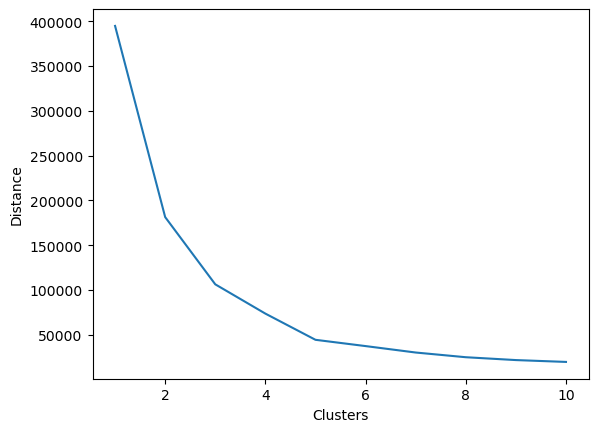

In [280]:
plt.plot(range(1,11),[181363.595960+213333.2312]+inertia) #since we didnt know inertia for cluster-1

plt.xlabel('Clusters')
plt.ylabel('Distance')

In [281]:
#🔥🔥🔥 It(wc_score) matches with the elbow method
#optimal no of cluster is 5✔️

Text(0, 0.5, 'wc_score')

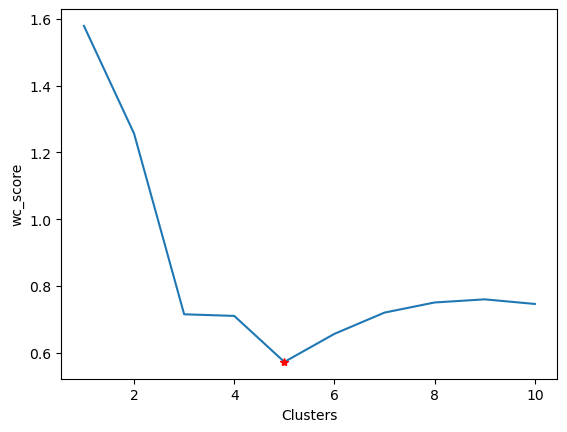

In [290]:
#for convienence we may draw wc_score
plt.plot(range(1,11),[1.256774+0.3223]	+wc_score) #since we didnt know inertia for cluster-1
plt.plot(5,0.572563,marker='*',color='red')
plt.xlabel('Clusters')
plt.ylabel('wc_score')

In [282]:
#lets define the n_clusters=5
kmeans2_c3 = KMeans(n_clusters=5)
kmeans2_c3.fit(data[['Annual Income (k$)','Spending Score (1-100)']]) 

KMeans(n_clusters=5)

In [283]:
data['income&ss_score_clusters'] = kmeans2_c3.labels_

In [284]:
kmeans2_c3.inertia_

44448.45544793371

In [285]:
silhouette_score(data[['Annual Income (k$)','Spending Score (1-100)']],data['income&ss_score_clusters'])

0.553931997444648

In [286]:
davies_bouldin_score(data[['Annual Income (k$)','Spending Score (1-100)']],data['income&ss_score_clusters'])

0.5725628995597087

In [287]:
#Hmm! nice but elbow method won't always provide acuurate results for this dataset the optimal one is 3 .

In [294]:
kmeans2_c3.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

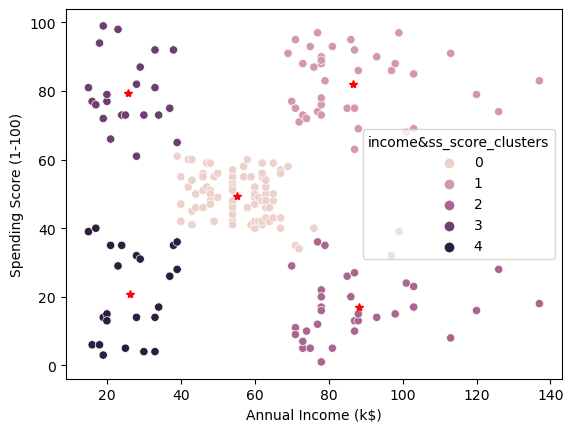

In [297]:
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=data['income&ss_score_clusters'])
plt.plot(kmeans2_c3.cluster_centers_[:,0],kmeans2_c3.cluster_centers_[:,1],marker='*',color='red',ls='')

### NOTE:
1.) actually there are 5 types of customers and we have found that a group cluster 4 interestingly though their annual income was very low in the <br>context they are spending at above 80% even some at 100% 😶😑<br>
-- might be error in data acquisition or may false information or else they are really loved ones of the Malls<br>
2.)and cluster 3 who were earning, were spending least at shoppings 🤔 they were the customers we have to actually pay attention on 
<br> We may cover them up by introducing some crazy offers also and by increasing the customer services up to them<br>
3.) Cluster 2 were really loved ones of the malls where they are less prone to churn! ❤️ we may need to plan some coverage to avoid losing those people.

In [292]:
#Now it looks better right! 😉❤

In [298]:
#lets do further intrepretation through clusters
data.groupby('income&ss_score_clusters')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean() #almost relatively spreads out except the last 2 groups /

,Age,Annual Income (k$),Spending Score (1-100)
income&ss_score_clusters,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [299]:
#We find it that legendary clusters no 4 is the YOUNG working people who actually earning around 25k spending at 80%
#By the by we can derive knowledge about the dimesions by correctly grouping along data.😊😊

### Multivariate Clustering !

In [302]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income_clusters', 'income&ss_score_clusters'],
      dtype='object')

In [311]:
#before adding AGE col let us encode that 
data = pd.get_dummies(data,drop_first=True,dtype='float')
#also dropping previous cluster
data1 = data.drop(['income_clusters', 'income&ss_score_clusters'],axis=1)

In [312]:
#Scaling for better intrepretaion
sc = StandardScaler()
data1 = sc.fit_transform(data1)

In [317]:
data1[:5]

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526]])

In [318]:
inertia = []
si_score = []
wc_score = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(data1) 
    inertia.append(km.inertia_)
    si_score.append(silhouette_score(data1,km.labels_))
    wc_score.append(davies_bouldin_score(data1,km.labels_))

In [319]:
pd.DataFrame(data=[inertia,si_score,wc_score],index=['inertia','si_score','wc_score'],columns=[i for i in range(2,11)])

,2,3,4,5,6,7,8,9,10
inertia,588.802677,476.773207,386.828426,325.109983,275.030671,239.175374,199.750461,174.119844,152.029834
si_score,0.251815,0.259715,0.301232,0.317091,0.334321,0.362087,0.387993,0.402972,0.420764
wc_score,1.613751,1.360702,1.291819,1.150599,1.013360,0.977866,0.944530,0.875963,0.833103


Text(0, 0.5, 'Distance')

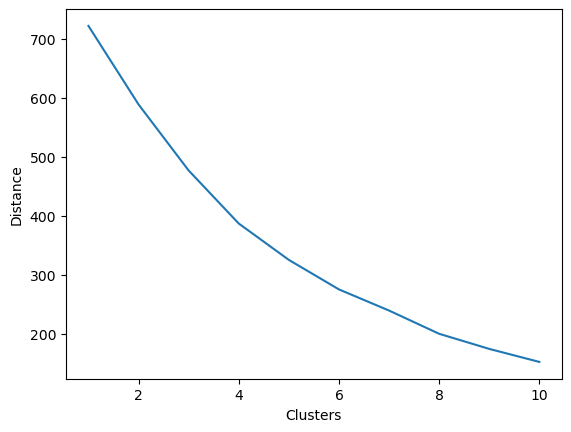

In [320]:
plt.plot(range(1,11),[588.802677+133.2312]+inertia) #since we didnt know inertia for cluster-1

plt.xlabel('Clusters')
plt.ylabel('Distance')

In [321]:
#it seems no bend actually so difficult
#we assume as 6
kmeans3 = KMeans(n_clusters=6)
kmeans3.fit(data1)

KMeans(n_clusters=6)

In [323]:
pd.DataFrame(kmeans3.labels_).value_counts() #good

2    46
4    41
3    36
5    28
0    26
1    23
Name: count, dtype: int64

In [324]:
#let us add this DATA file
data['3d_cluster'] = kmeans3.labels_

In [331]:
data.groupby('3d_cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
3d_cluster,,,
0,26.576923,32.653846,62.923077
1,39.043478,90.608696,15.391304
2,50.217391,53.543478,36.739130
3,30.527778,79.777778,65.583333
4,28.536585,61.804878,71.097561
5,57.214286,46.785714,38.714286


In [332]:
#though here 3d_cluster specifies the cluster 2 where people earnig almost 90k having the least spending score at 15% which is somewhat important to consider
#but we lost one very good information which we got in previous cluster(2d).

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

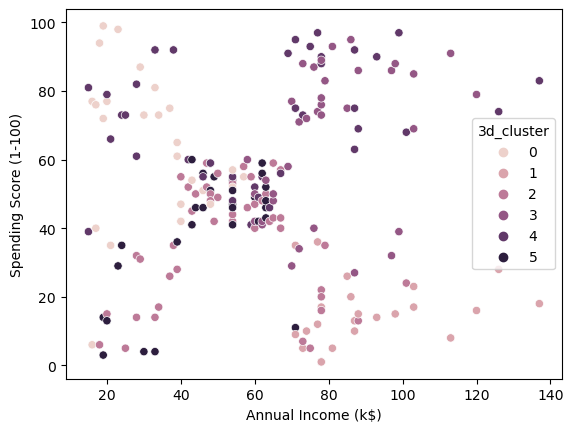

In [333]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='3d_cluster')

In [334]:
#just plot it out in prev one income vs ss score to find how far it matches but completely different when GENDER added
#yet somewhat it too finds some insights 🤞

In [330]:
#if you want ,,😉 save it!!
data.to_csv('Shopping_Mall_Clusters.csv')

### THANK YOU! ❤️❤️:-).!
--Abubacker S